### **a. Write a Python program to load and read one categorical data from a CSV file.**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def read_categorical_csv(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    header = lines[0].strip().split(',')
    print("Header:", header)

    for line in lines[1:]:
        values = line.strip().split(',')
        print(values)


In [8]:
file_path = '/content/sample_data/cancer_demographics.csv'
read_categorical_csv(file_path)

Header: ['PatientID', 'Gender', 'AgeGroup', 'FamilyHistory', 'CancerType', 'Stage']
['P001', 'Male', '30-39', 'Yes', 'Breast', 'Stage I']
['P002', 'Female', '50-59', 'No', 'Lung', 'Stage II']
['P003', 'Female', '40-49', 'Yes', 'Colon', 'Stage III']
['P004', 'Male', '60-69', 'No', 'Prostate', 'Stage II']
['P005', 'Female', '30-39', 'Yes', 'Breast', 'Stage I']
['P006', 'Male', '70-79', 'No', 'Skin', 'Stage I']
['P007', 'Female', '50-59', 'Yes', 'Lung', 'Stage III']
['P008', 'Female', '60-69', 'No', 'Colon', 'Stage II']
['P009', 'Male', '40-49', 'Yes', 'Prostate', 'Stage I']
['P010', 'Male', '70-79', 'No', 'Skin', 'Stage II']


### **b. Convert it into a transactional format using their attribute-value pair. Give a numerical value for each attribute value pair. After that make a binary dataset from the categorical format where the numbers given to each attribute value pair represent a column name.**

In [9]:
def make_transactions(filename):
  with open(filename, 'r') as file:
    lines = file.readlines()

  header = lines[0].strip().split(',')[1:]
  all_data=[]

  for line in lines[1:]:
    values=line.strip().split(',')[1:]
    row=[header[i]+"="+values[i] for i in range(len(values))]
    all_data.append(row)
  return all_data

def binary_table(data):
  unique_values=[]
  for row in data:
    for item in row:
      if item not in unique_values:
        unique_values.append(item)
  table=[]
  for row in data:
    binary_row=[1 if item in row else 0 for item in unique_values]
    table.append(binary_row)
  return unique_values,table

def save_csv(filename,header,data):
  with open(filename,'w') as file:
    file.write(','.join(header)+'\n')
    for row in data:
      file.write(','.join(map(str,row))+'\n')

transactions=make_transactions(file_path)
unique_values,binary_data=binary_table(transactions)
save_csv('binary_data.csv',unique_values,binary_data)

print("Saved")

Saved


### **c. Draw the corresponding graph considering the binary dataset as the value present in it.**

In [54]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

def draw_binary_graph(csv_file, output_filename=None):
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        data = [list(map(int, row)) for row in reader]

    G = nx.Graph()

    for name in header:
        G.add_node(name)
    print("Node names:", G.nodes())


    for row in data:
        ones = [header[i] for i in range(len(row)) if row[i] == 1]
        for i in range(len(ones)):
            for j in range(i + 1, len(ones)):
                G.add_edge(ones[i], ones[j])

    plt.figure(figsize=(10, 7))
    nx.draw_networkx(G, with_labels=False, node_color='skyblue', edge_color='gray')
    plt.title("Graph from Binary Dataset")
    plt.axis('off')

    if output_filename:
        plt.savefig(output_filename, bbox_inches='tight')
        print(f"Graph saved to {output_filename}")
    else:
        plt.show()

Node names: ['Gender=Male', 'AgeGroup=30-39', 'FamilyHistory=Yes', 'CancerType=Breast', 'Stage=Stage I', 'Gender=Female', 'AgeGroup=50-59', 'FamilyHistory=No', 'CancerType=Lung', 'Stage=Stage II', 'AgeGroup=40-49', 'CancerType=Colon', 'Stage=Stage III', 'AgeGroup=60-69', 'CancerType=Prostate', 'AgeGroup=70-79', 'CancerType=Skin']
Graph saved to /content/graph.png


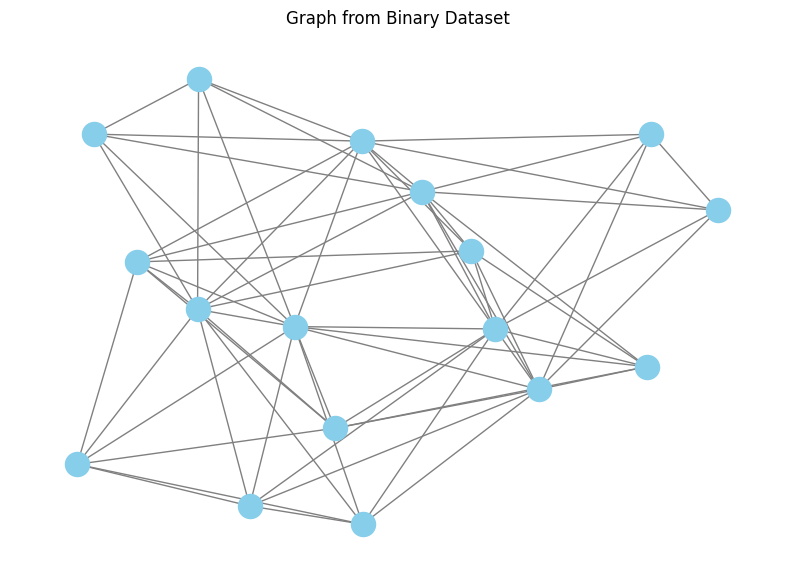

In [55]:
draw_binary_graph('binary_data.csv', '/content/graph.png')

### **d. Run the single pair shortest path problem and draw the path on the graph.**

In [60]:
import pandas as pd

def draw_binary_graph(csv_file, output_filename=None):
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        data = [list(map(int, row)) for row in reader]

    G = nx.Graph()

    for name in header:
        G.add_node(name)

    for row in data:
        ones = [header[i] for i in range(len(row)) if row[i] == 1]
        for i in range(len(ones)):
            for j in range(i + 1, len(ones)):
                G.add_edge(ones[i], ones[j])
    return G

G = draw_binary_graph('binary_data.csv')
pos = nx.spring_layout(G)

start_node = 'Gender=Male'
end_node = 'Stage=Stage III'
shortest_path = nx.shortest_path(G, source=start_node, target=end_node)
print(f"Shortest path between '{start_node}' and '{end_node}': {shortest_path}")

Shortest path between 'Gender=Male' and 'Stage=Stage III': ['Gender=Male', 'FamilyHistory=Yes', 'Stage=Stage III']


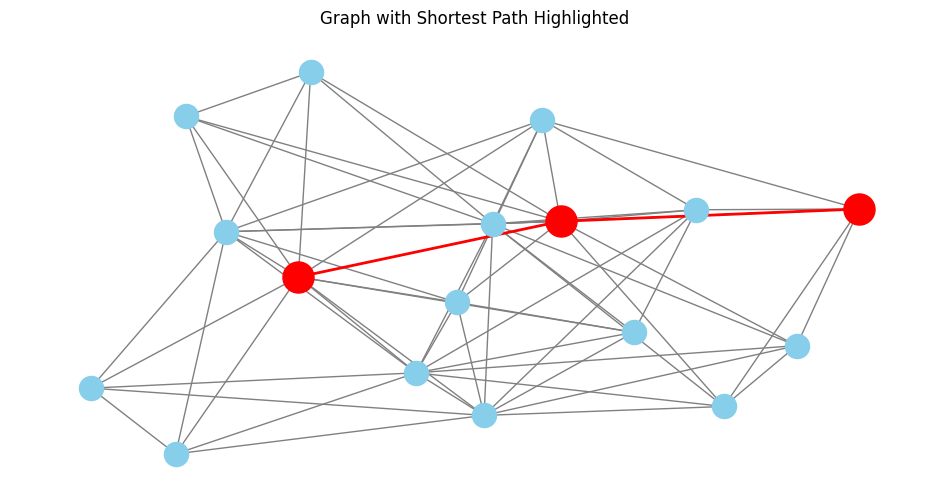

In [61]:
shortest_path = ['Gender=Male', 'FamilyHistory=Yes', 'Stage=Stage III']
shortest_path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]

plt.figure(figsize=(12, 6))
nx.draw_networkx(G, pos, with_labels=False, node_color='skyblue', edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='red', node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=2)

plt.title("Graph with Shortest Path Highlighted")
plt.axis('off')
plt.show()